<h1 style="font-size:80px;text-align:center;padding:50px 0;color:Black;border-radius:20px;background-color:red">Retina Damage Detection</h1>

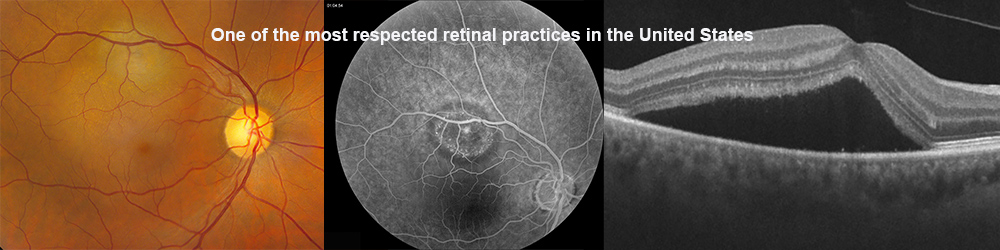

#  Import Main libraries

In [1]:
# Import libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras import backend as K
K.image_data_format()
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
import glob
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle
from glob import glob
import skimage
warnings.filterwarnings("ignore")
import gc

# Discover the classes in each folder

In [2]:
train ="/kaggle/input/kermany2018/OCT2017 /train"
test ="/kaggle/input/kermany2018/OCT2017 /test"
validation ="/kaggle/input/kermany2018/OCT2017 /val"
main_dir = os.listdir('/kaggle/input/kermany2018/OCT2017 /')
print(main_dir)

for i in main_dir:
    data_dir_list =  os.listdir('/kaggle/input/kermany2018/OCT2017 /'+ str(i) )
    print(i, data_dir_list)

['val', 'test', 'train']
val ['DRUSEN', 'CNV', 'NORMAL', 'DME']
test ['DRUSEN', 'CNV', 'NORMAL', 'DME']
train ['DRUSEN', 'CNV', 'NORMAL', 'DME']


In [3]:
myList = os.listdir("/kaggle/input/kermany2018/OCT2017 /train")
print("Total Number of Classes Detected :",len(myList))
noOfclasses= len(myList)
print(myList)

Total Number of Classes Detected : 4
['DRUSEN', 'CNV', 'NORMAL', 'DME']


# Defining the Classes
### It contains four classes

- DRUSEN --> Eye contains yellow deposits under the retina
- CNV --> Presence of intraretinal or subretinal fluid, PEDs and/or RPE rips.
- NORMAL --> Eye is in normal condition
- DME --> Diabetic macular edema (DME) is a major cause of visual loss in the patients with diabetic retinopathy.

<h1 style="font-size:80px;text-align:center;padding:50px 0;color:Black;border-radius:20px;background-color:red">Retina Visualization</h1>

# Normal Retina

Normal


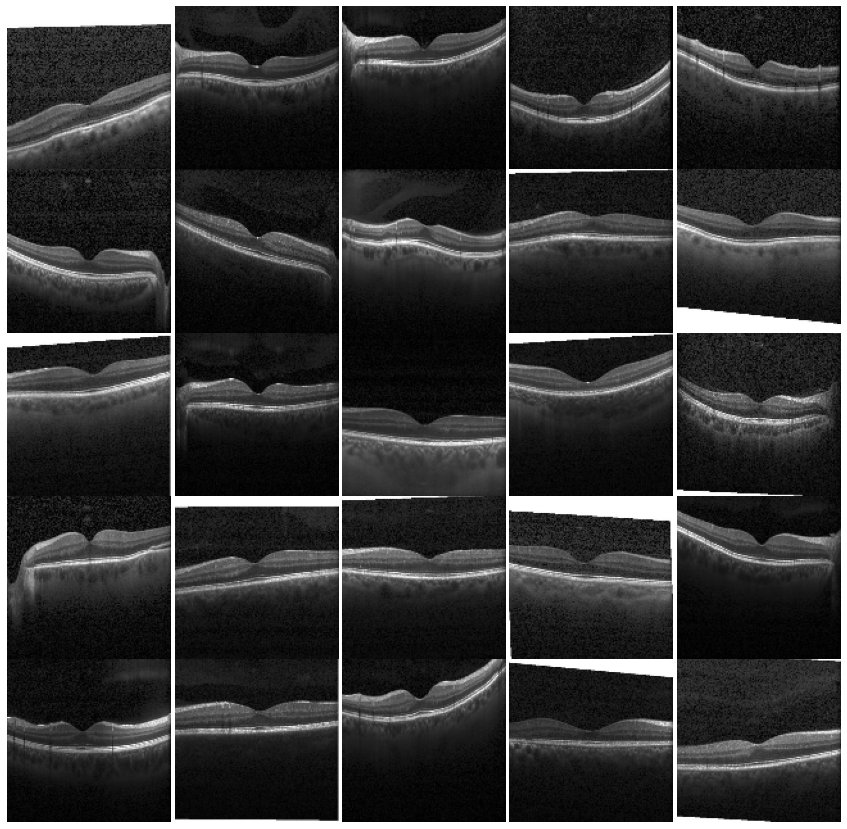

In [4]:
print("Normal")
multipleImages = glob('../input/kermany2018/oct2017/OCT2017 /train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

# Abnormal Retina images is DRUSEN or CNV or DME

DME


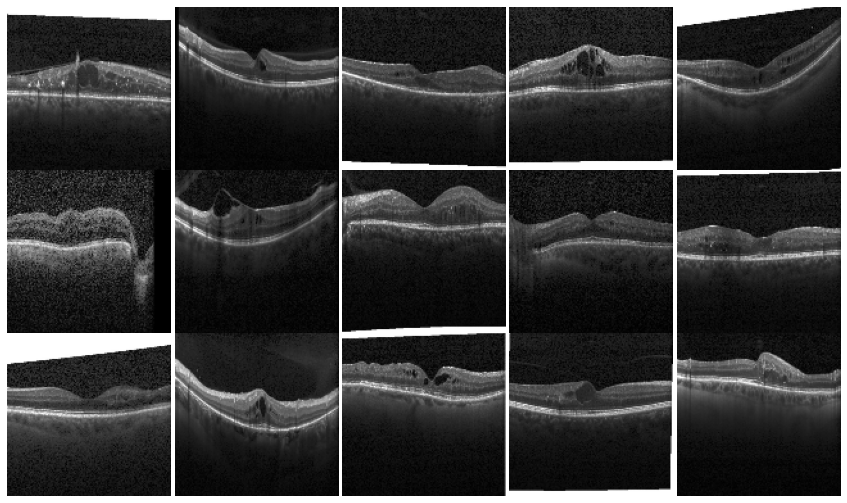

In [5]:
print("DME")
multipleImages = glob('../input/kermany2018/oct2017/OCT2017 /train/DME/**')
i_ = 0
plt.rcParams['figure.figsize']  =  (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

CNV


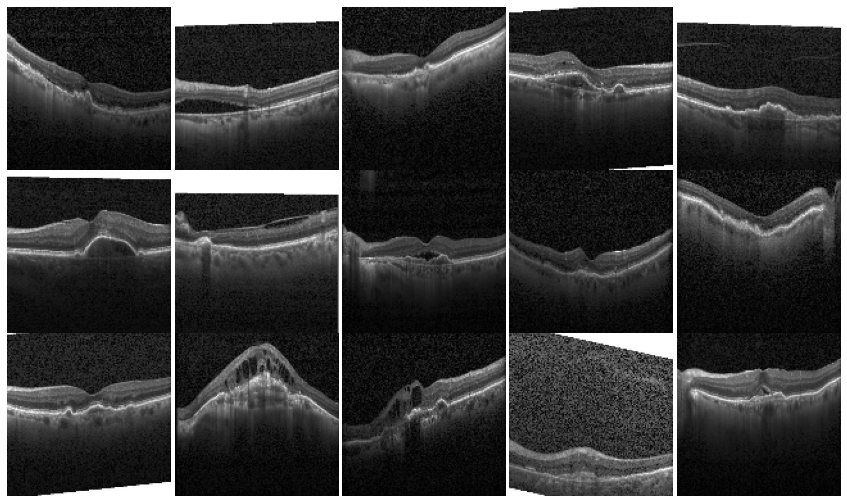

In [6]:
print("CNV")
multipleImages = glob('../input/kermany2018/oct2017/OCT2017 /train/CNV/**')
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

DRUSEN


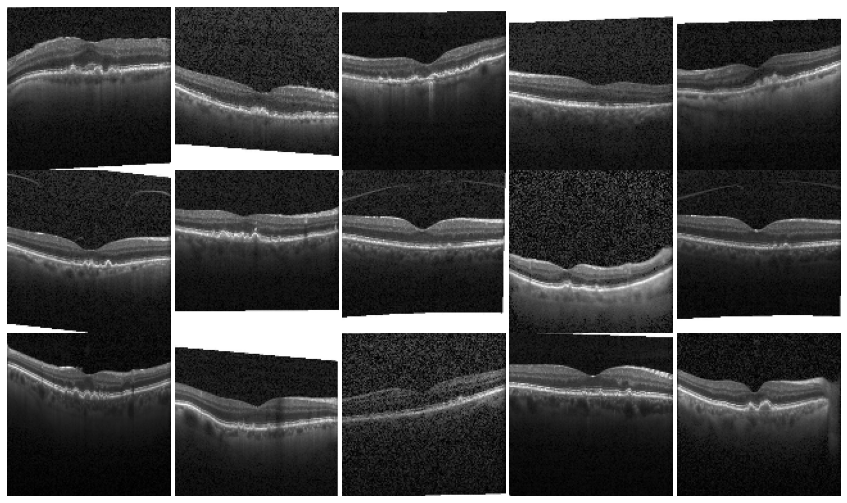

In [7]:
print("DRUSEN")
multipleImages = glob('../input/kermany2018/oct2017/OCT2017 /train/DRUSEN/**')
i_ = 0
plt.rcParams['figure.figsize']  = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

<h1 style="font-size:80px;text-align:center;padding:50px 0;color:Black;border-radius:20px;background-color:red">Images preprocessing</h1>

# Apply diffrent filters on images

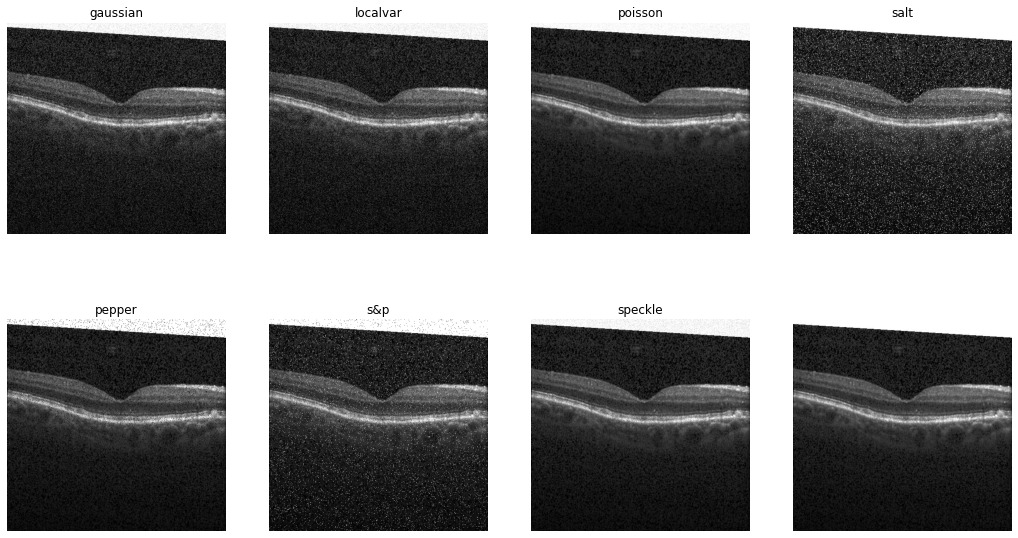

In [8]:
img_path="../input/kermany2018/OCT2017 /train/DRUSEN/DRUSEN-1001666-1.jpeg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg,cmap=plt.cm.gray)
    else:
        plt.imshow(img,cmap=plt.cm.gray)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,10))
r=2
c=4
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img,None , r,c,8)
plt.show()

In [9]:
path1 ="/kaggle/input/kermany2018/OCT2017 /train"
image_size=(128,128)
myList = os.listdir(path1)
some_images=[]
classNo=[]
for x in myList:
  myPicList = os.listdir(path1+"/"+str(x))
  for y in myPicList[:2]:
    curImg = cv2.imread(path1+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    some_images.append(curImg)
images = np.array(some_images)

In [10]:
height = 220
width = 220
dim = (width, height)
res_img1 = []
for i in range(len(images)): 
        res1 = cv2.resize(images[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img1.append(res1)


print("RESIZED", res_img1[1].shape)

RESIZED (220, 220, 3)


# Apply some preprocessing on images

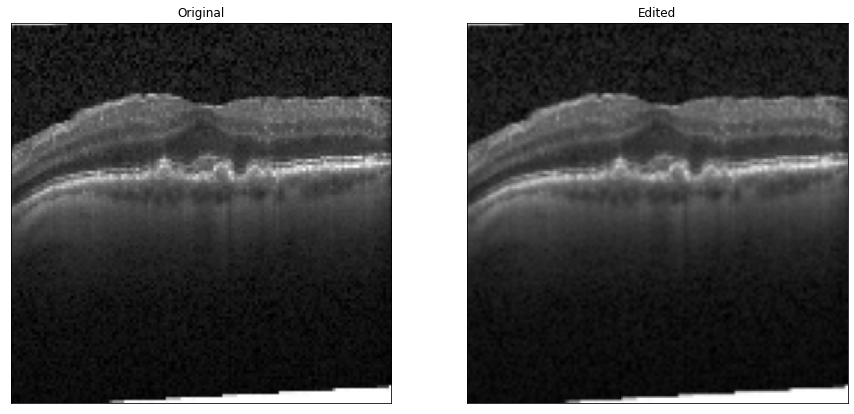

In [11]:
def display_one(images, title1 = "Original"):
    plt.imshow(images[0]), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(images, res_img, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(images[0],cmap=plt.cm.gray), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(res_img[0],cmap=plt.cm.gray), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
display(images,res_img1,title1 = "Original", title2 = "Edited")    

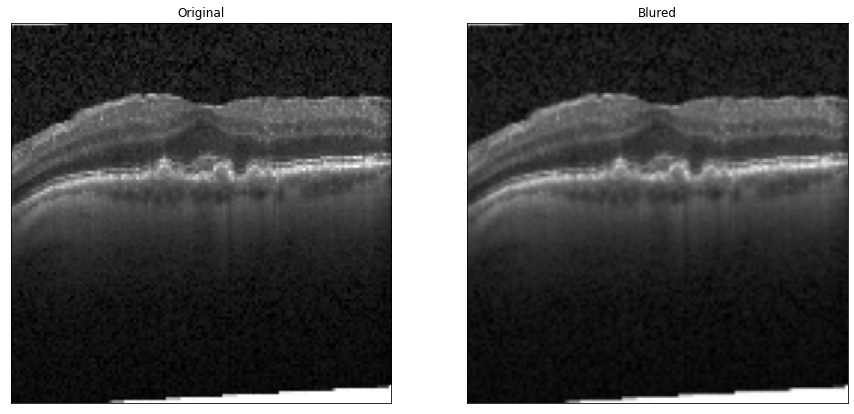

In [12]:
no_noise = []
for i in range(len(res_img1)):
    blur = cv2.GaussianBlur(res_img1[i], (5, 5), 0)
    no_noise.append(blur)


image = no_noise[1]
display(images, res_img1, 'Original', 'Blured')

<h1 style="font-size:80px;text-align:center;padding:50px 0;color:Black;border-radius:20px;background-color:red">Read 40,000 image</h1>

# Read 10000 images from each class to train 

In [13]:
img_data_list=[]
img=0

# Define the number of classes
labels = []

for i in main_dir:
    data_dir_list =  os.listdir('/kaggle/input/kermany2018/OCT2017 /'+ str(i) )
    print(i, data_dir_list)
    
    for dataset in data_dir_list:
        img_list = os.listdir( '/kaggle/input/kermany2018/OCT2017 /'+str(i)+ '/' + dataset)
        print ('Loading the images of dataset-'+'{}\n'.format(dataset))
        
        for img in img_list[:10000]:
            input_img=cv2.imread('/kaggle/input/kermany2018/OCT2017 /' + str(i)+ '/'+ dataset + '/'+ img)
            
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(128,128))
            
            img_data_list.append(input_img_resize)
            
            if dataset==  'DRUSEN':
                labels.append(0)
                
            if dataset == 'CNV':
                labels.append(1)
                
            if dataset == 'NORMAL':
                labels.append(2)
                
            if dataset == 'DME':
                labels.append(3)

val ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Loading the images of dataset-DRUSEN

Loading the images of dataset-CNV

Loading the images of dataset-NORMAL

Loading the images of dataset-DME

test ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Loading the images of dataset-DRUSEN

Loading the images of dataset-CNV

Loading the images of dataset-NORMAL

Loading the images of dataset-DME

train ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Loading the images of dataset-DRUSEN

Loading the images of dataset-CNV

Loading the images of dataset-NORMAL

Loading the images of dataset-DME



In [14]:
len(img_data_list)

39616

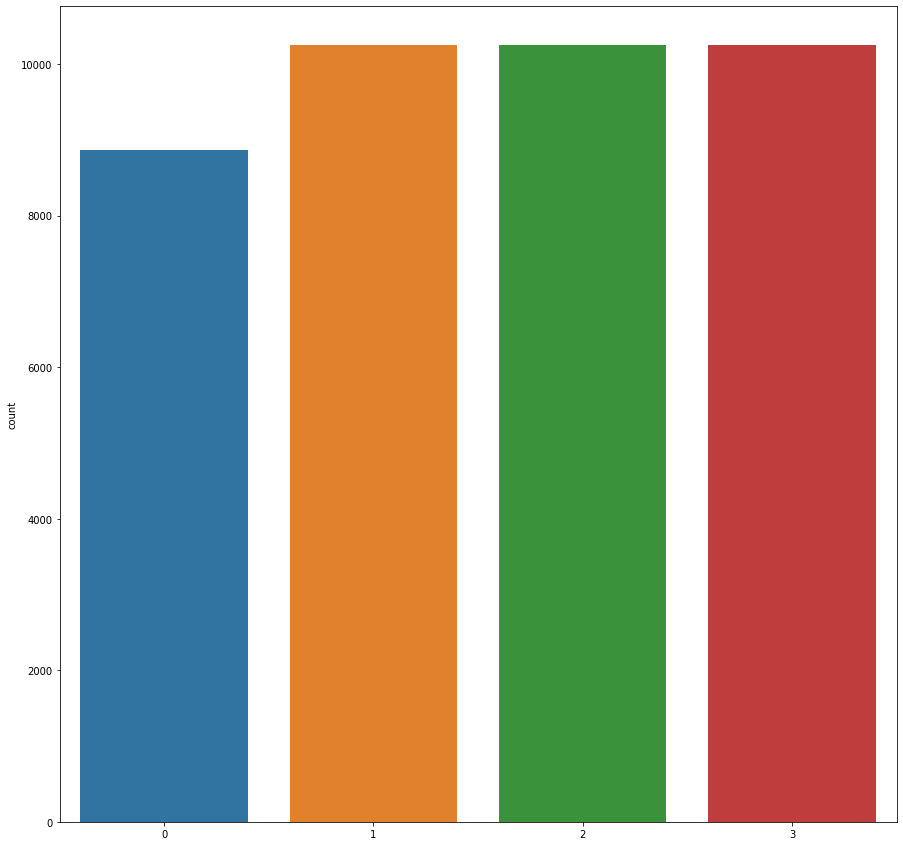

In [15]:
import seaborn as sns 
sns.countplot(labels);
plt.show()

<h1 style="font-size:80px;text-align:center;padding:50px 0;color:Black;border-radius:20px;background-color:red">Image scaling</h1>

In [16]:
img_data_list = np.array(img_data_list)
img_data_list = img_data_list.astype('float32')
img_data_list /= 255
print (img_data_list.shape)

(39616, 128, 128)


# Adjust the dimensions of images 

In [17]:
num_channel=1
if num_channel==1:
    if K.image_data_format()=='th':
        img_data_list= np.expand_dims(img_data_list, axis=1)
        print (img_data_list.shape)
    else:
        img_data_list= np.expand_dims(img_data_list, axis=3)
        print (img_data_list.shape)

else:
    if K.image_data_format()=='th':
        img_data_list = np.rollaxis(img_data_list,3,1)
        print (img_data_list.shape)

(39616, 128, 128, 1)


# Define the number of classes

In [18]:
num_classes = 4

names = ['DRUSEN','CNV','NORMAL', 'DME']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

<h1 style="font-size:80px;text-align:center;padding:50px 0;color:Black;border-radius:20px;background-color:red">Modeling</h1>

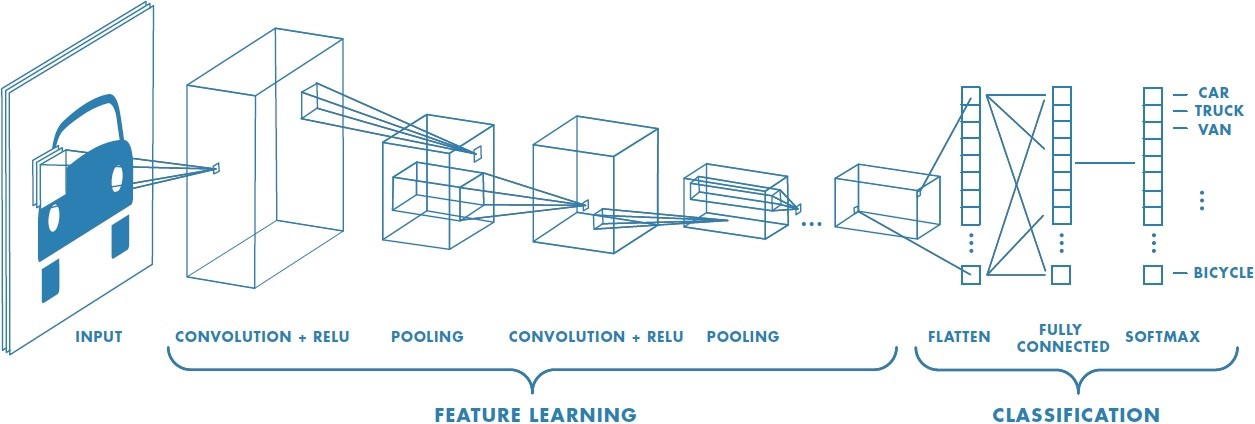

In [19]:
# Split the dataset 

X_train, X_test, y_train, y_test = train_test_split(img_data_list, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28522, 128, 128, 1)
(28522, 4)
(7924, 128, 128, 1)
(7924, 4)
(3170, 128, 128, 1)
(3170, 4)


In [21]:
gc.collect()

32330

In [22]:
def model():
  filters=60
  sizeoffilter1 = (5,5)
  sizeoffilter2 = (4,4)
  sizeoffilter3 = (3,3)
  sizeofpool = (2,2)
  node=5000

  model = Sequential();
  model.add((Convolution2D(filters,sizeoffilter1,input_shape=(128,128,1)
  ,activation="relu")))

  model.add((Convolution2D(filters,sizeoffilter1,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Convolution2D(filters,sizeoffilter1,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Convolution2D(filters,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add((Convolution2D(filters//2,sizeoffilter3,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter3,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(node,activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(4,activation="softmax"))

  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

  return model
  
model=model()
model.summary()

2022-11-15 22:42:09.454020: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:42:09.456751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:42:09.794408: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:42:09.795319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:42:09.796132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 60)      1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 60)      90060     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 30)      28830     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 114, 114, 30)      14430     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 57, 57, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 57, 57, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 53, 53, 60)        4

2022-11-15 22:42:10.040515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:42:10.041365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:42:10.042197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:42:10.042928: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:42:10.043716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Fitting the model

In [23]:
history = model.fit(X_train,y_train,epochs=25,batch_size=256,
                    shuffle=True,
                    max_queue_size=20,
                    use_multiprocessing=True,
                    workers=1,validation_data=(X_val, y_val))

2022-11-15 22:42:15.406424: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1869217792 exceeds 10% of free system memory.
2022-11-15 22:42:17.559408: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1869217792 exceeds 10% of free system memory.
2022-11-15 22:42:19.093583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-11-15 22:42:21.988145: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


112/112 [==============================] - ETA: 0s - loss: 1.0938 - accuracy: 0.5126

2022-11-15 22:44:08.652073: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 207749120 exceeds 10% of free system memory.
2022-11-15 22:44:08.909844: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 207749120 exceeds 10% of free system memory.


112/112 [==============================] - 114s 772ms/step - loss: 1.0938 - accuracy: 0.5126 - val_loss: 0.7557 - val_accuracy: 0.7186
Epoch 2/25
112/112 [==============================] - 81s 720ms/step - loss: 0.7147 - accuracy: 0.7273 - val_loss: 0.6341 - val_accuracy: 0.7606
Epoch 3/25
112/112 [==============================] - 81s 719ms/step - loss: 0.6296 - accuracy: 0.7626 - val_loss: 0.5569 - val_accuracy: 0.7987
Epoch 4/25
112/112 [==============================] - 80s 718ms/step - loss: 0.5298 - accuracy: 0.8076 - val_loss: 0.4617 - val_accuracy: 0.8363
Epoch 5/25
112/112 [==============================] - 80s 719ms/step - loss: 0.4444 - accuracy: 0.8379 - val_loss: 0.4109 - val_accuracy: 0.8568
Epoch 6/25
112/112 [==============================] - 80s 719ms/step - loss: 0.3830 - accuracy: 0.8624 - val_loss: 0.3535 - val_accuracy: 0.8700
Epoch 7/25
112/112 [==============================] - 80s 718ms/step - loss: 0.3547 - accuracy: 0.8738 - val_loss: 0.3323 - val_accuracy: 0.

<h1 style="font-size:80px;text-align:center;padding:50px 0;color:Black;border-radius:20px;background-color:red">Model Evaluation</h1>

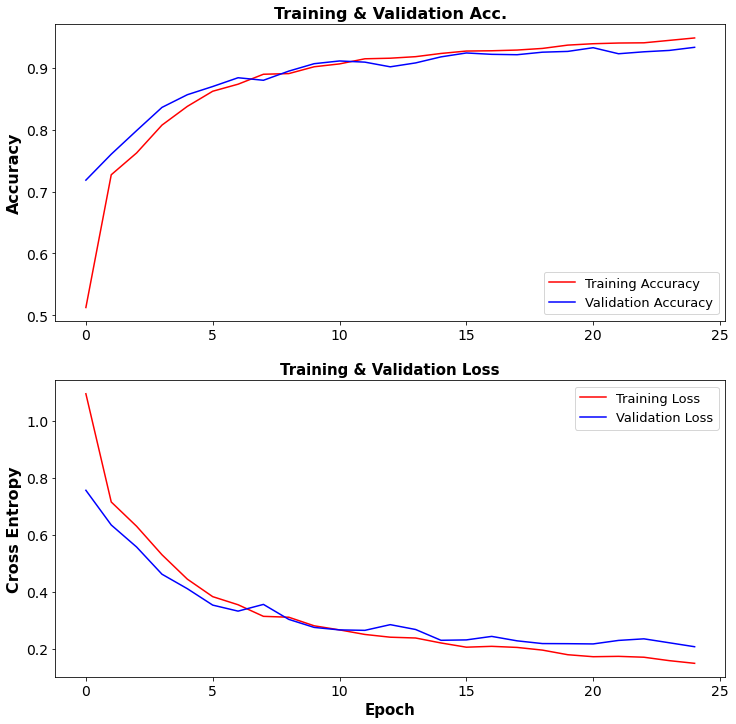

In [24]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
 
 
plt.figure(figsize=(12, 12)) 
 
plt.subplot(2, 1, 1) 
plt.plot(acc, label='Training Accuracy', color='r') 
plt.plot(val_acc, label='Validation Accuracy', color='b') 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.legend(loc='lower right', fontsize=13) 
plt.ylabel('Accuracy', fontsize=16, weight='bold') 
plt.title('Training & Validation Acc.', fontsize=16, weight='bold') 
 
 
plt.subplot(2, 1, 2) 
plt.plot(loss, label='Training Loss', color='r') 
plt.plot(val_loss, label='Validation Loss', color='b') 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.legend(loc='upper right', fontsize=13) 
plt.ylabel('Cross Entropy', fontsize=16, weight='bold') 
plt.title('Training & Validation Loss', fontsize=15, weight='bold') 
plt.xlabel('Epoch', fontsize=15, weight='bold') 
 
plt.show()

In [25]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model.evaluate(X_test, y_test)
print('Test Loss:', score[0])

print('Test accuracy:', score[1])

2022-11-15 23:16:26.820683: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 519307264 exceeds 10% of free system memory.


248/248 [==============================] - 9s 31ms/step - loss: 0.2181 - accuracy: 0.9317
Test Loss: 0.21813897788524628
Test accuracy: 0.9317263960838318


# Test cases

In [26]:
imge_path1 = "../input/kermany2018/OCT2017 /train/DME/DME-1072015-1.jpeg"  #DME
imge_path2 = "../input/kermany2018/OCT2017 /train/CNV/CNV-1016042-100.jpeg"  #DRUSEN

def predict(img): 
    input_img = cv2.imread(img) 
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY) 
    input_img_resize = cv2.resize(input_img,(128,128))                     
    input_img_resize = np.expand_dims(input_img_resize, axis=2) 
    input_img_resize = np.expand_dims(input_img_resize, axis=0) 
    model_prediction = model.predict(input_img_resize) 
    model_prediction = model_prediction.astype(int) 
    return model_prediction 

print(predict(imge_path1))
print(predict(imge_path2))

# The order of labels
# 'DRUSEN','CNV','NORMAL', 'DME'

[[0 0 0 1]]
[[1 0 0 0]]


#### True prediction for 2 random test cases

# Save The model h5 and json files 

to use in deployment 

In [27]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


<h1 style="font-size:80px;text-align:center;padding:50px 0;color:Black;border-radius:20px;background-color:red">End</h1>